In [1]:
import torch
import numpy as np
import torch
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import fit.sine as T

from IPython.display import HTML
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt

%matplotlib inline
torch.set_printoptions(precision=4, linewidth=500, sci_mode=True)

/Users/antonis/miniforge3/envs/python3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


FileNotFoundError: [Errno 2] No such file or directory: '3D_centers16.pkl'

In [2]:
T.train()

/Users/antonis/miniforge3/envs/python3.10/lib/python3.10/site-packages/torch/storage.py:505: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))
/

TypeError: ODEINDLayer.__init__() missing 1 required positional argument: 'n_iv_steps'

In [3]:
end = T.method.model.end
n_step = T.method.model.n_step
_y = np.linspace(0, end, n_step)

AttributeError: module 'fit.sine' has no attribute 'method'

In [ ]:
a,b,c,d= T.method.on_train_end()

Learned Coefficients: [-0.08547077 -1.1830999  -0.09297243]
Learned ODE: -0.0930 * u''(t) + -1.1831 * u'(t) + -0.0855 * u(t) + -1.8596 = 0
Plot saved as 'learned_equation_plot.png'.
Plot closed.


In [ ]:
print(a,b,c)
# 

-0.09297243 -1.1830999 -0.08547077


In [ ]:
func_list = T.method.func_list
funcp_list = T.method.funcp_list
funcpp_list = T.method.funcpp_list
step_list = T.method.steps_list
y_list = T.method.y_list
n_iter =10000

In [ ]:
y = y_list[-1][0][:] 
u2 = funcpp_list[-1][0][0][:]
u1 = funcp_list[-1][0][0][:]
u0 = func_list[-1][0][0][:]

In [ ]:
d = d.detach().cpu().numpy()

AttributeError: 'float' object has no attribute 'detach'

In [ ]:
print(a,b,c)

-0.8672086 2.2428896 1.7021627


In [ ]:
y1 = np.gradient(y)

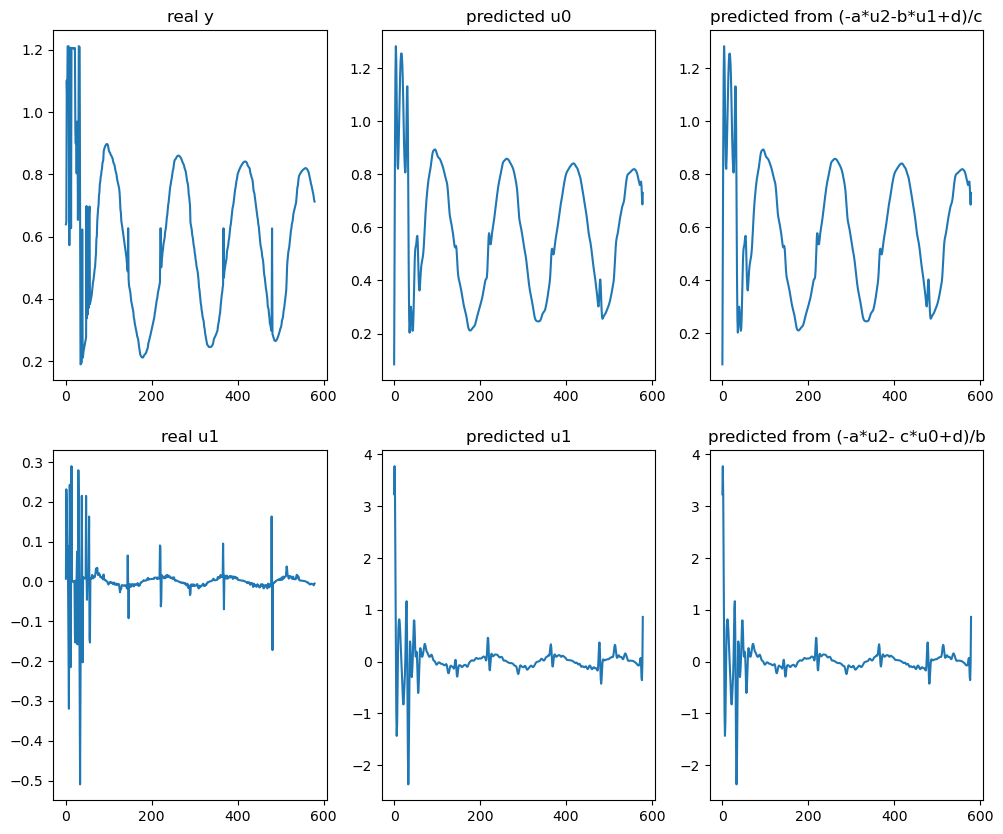

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(12, 10))
axs[0, 0].plot(y)
axs[0, 0].set_title('real y')
axs[0, 1].plot(u0)
axs[0,1].set_title('predicted u0')

axs[0,2].plot(((-a*u2-b*u1+d)/c))
axs[0,2].set_title('predicted from (-a*u2-b*u1+d)/c')




axs[1,0].plot(y1)
axs[1,0].set_title('real u1')
axs[1,1].plot(u1)
axs[1,1].set_title('predicted u1')
axs[1,2].plot(((-a*u2- c*u0+d)/b))
axs[1,2].set_title("predicted from (-a*u2- c*u0+d)/b")

plt.show()



In [ ]:
np.sum(a*u2 + b*u1 + c*u0 -d)


-0.00022161007

In [ ]:
print(max(d))
print(min(d))

18.026209
-8.929608


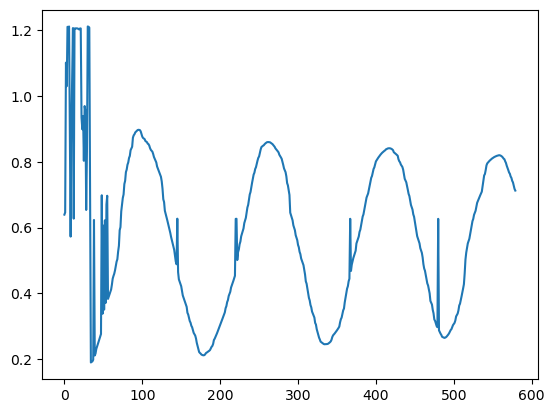

In [ ]:
plt.plot(y)

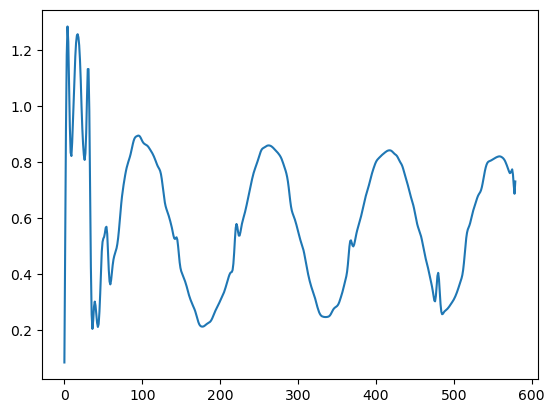

In [ ]:
plt.plot(((-a*u2-b*u1+d)/c))

In [ ]:
np.sum(a*u2 + b*u1 + c*u0-d)

-0.00022161007

In [ ]:

# y_pred = T.method.func_list[-1].reshape(-1)
# y_true = T.method.y_list[0].reshape(-1)

# y_pred = y_pred[:200]
# y_true = y_true[:200]

# deviation_percentages = [0.15, 0.25]

# def process_dataset(filename):
#     with open(filename, 'rb') as f:
#         data = pickle.load(f)

#     data_len = len(data)
#     t = np.arange(1, data_len + 1)
#     x = np.array([item[0] if item is not None else np.nan for item in data])
#     y = np.array([item[1] if item is not None else np.nan for item in data])

#     df = pd.DataFrame({'t': t, 'x': x, 'y': y})

#     first_valid_index_x = df['x'].first_valid_index()
#     first_valid_index_y = df['y'].first_valid_index()
#     first_valid_index = min(first_valid_index_x, first_valid_index_y)

#     df = df.loc[first_valid_index:].reset_index(drop=True)

#     df['x'] = df['x'].interpolate(method='linear').div(1000).bfill().ffill()
#     df['y'] = df['y'].interpolate(method='linear').div(1000).bfill().ffill()

#     y = torch.tensor(df['x'].values[:200], dtype=torch.float32).numpy()

#     return y

# filenames = ['3D_centers5.pkl', '3D_centers2.pkl', '3D_centers8.pkl', 'centers.pkl', '3D_centers6.pkl','3D_centers.pkl']

# for delta in deviation_percentages:
#     lower_bound = y_pred * (1 - delta)
#     upper_bound = y_pred * (1 + delta)

#     plt.figure(figsize=(12, 6))
#     plt.fill_between(range(len(y_pred)), lower_bound, upper_bound, color='gray', alpha=0.3, label=f'{int(delta*100)}% Deviation Range')
#     plt.plot(y_pred, label='Learned Trajectory', color='blue', linewidth=2)

#     for filename in filenames:
#         y_new = process_dataset(filename)
#         min_length = min(len(y_new), len(y_pred))
#         y_new = y_new[:min_length]
#         lb = lower_bound[:min_length]
#         ub = upper_bound[:min_length]

#         within_range = (y_new >= lb) & (y_new <= ub)
#         score = within_range.sum() / min_length * 100

#         plt.plot(y_new, label=f'{filename} ({score:.1f}% within range)')

#     plt.title(f'Comparison with {int(delta*100)}% Deviation')
#     plt.xlabel('Time Step')
#     plt.ylabel('Value')
#     plt.legend()
#     plt.show()


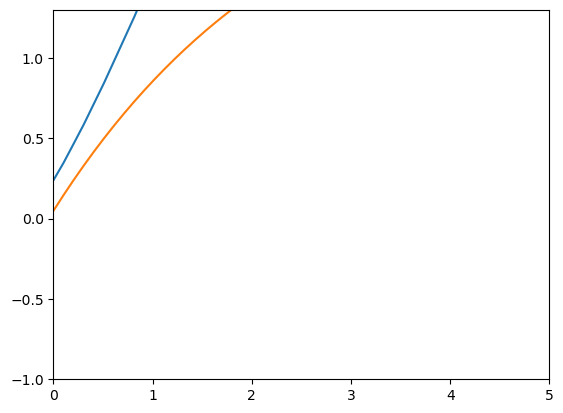

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlim((0,end))
ax.set_ylim((-1,1.3))

line1, = ax.plot([], [])
line2, = ax.plot([], [])


def animate(t):
    line1.set_data(_y,y_list[2*t])
    line2.set_data(_y,func_list[2*t])
    return line1,
anim = FuncAnimation(fig, animate, frames=250, interval=20, blit=True)

HTML(anim.to_html5_video())